# Assignment 1: Question 4

Consider the _911.csv_ dataset containing information about emergency calls received on the 911 emergency line in America.

The data contains the following variables:

| variable      | Description                                        |
|------------|----------------------------------------------------|
| lat        | Latitude                                           |
| lng        | Longitude                                          |
| desc       | Description of the Emergency Call                 |
| zip        | Zipcode                                            |
| title      | Title code                                              |
| timeStamp  | YYYY-MM-DD HH:MM:SS                                |
| twp        | Township                                           |
| addr       | Address                                            |
| e          | Dummy variable (always 1)                         |

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
emergency = pd.read_csv("911.csv")

1. Retrieve the first 7 rows of the dataset.

In [3]:
emergency[:7]

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 17:40:01,HORSHAM,LAUREL AVE & OAKDALE AVE,1


2. How many rows and columns does the dataset contain?

In [4]:
emergency.shape

(99492, 9)

3. How many columns contain missing data?

In [24]:
emergency.isnull().sum()

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
Reason           0
dtype: int64

4. Which 5 zipcodes have the most 911 calls?

In [10]:
emergency["zip"].value_counts().iloc[:5]

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

5. Take a look at the 'title' column. How many unique title codes are there?

In [11]:
emergency["title"].nunique()

110

6. The title column gives information about the reason for the call. 

eg. 'EMS: BACK PAINS/INJURY' indicates that the _Reasons/Departments_ was EMS and the specific _Issue_ was BACK PAINS/INJURY.

All of the entries are formatted in this manner: **Reasons/Departments: Issue**

There are 3 possible _Reasons/Departments_: EMS, Fire, and Traffic and they are all indicated before the colon in the title code.

The obective is to create an new column called `Reason` that contains only the _Reasons/Departments_ information. ie. EMS, Fire, or Traffic.

a. Create function called `reason_extractor` that will select only the _Reasons/Departments_ from each title. 

Example: 'reason_extractor' must take in a string, eg. 'EMS: BACK PAINS/INJURY' and return only 'EMS'

(HINT: Consider the .split() method that is available for string variables.)

In [12]:
def reason_extractor(string):
    result = string.split(':')[0]
    return result

Test your function on 'Fire: GAS-ODOR/LEAK'. If you give it this string, does it output 'Fire'?

In [13]:
reason_extractor('Fire: GAS-ODOR/LEAK')

'Fire'

b. Now use the .apply() method with a custom lambda expression to create a new column in your dataframe that is called "Reason" which contains the _Reasons/Departments_ information (ie. EMS, Fire, or Traffic only).

In [16]:
emergency['Reason'] = emergency['title'].apply(reason_extractor)
emergency

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS


7.  How many calls were received for each _Reasons/Departments_ based off of the new "Reason" column?

In [15]:
emergency['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

8. Use `matplotlib` to plot a histogram showing the proportion of all the calls that were assigned to each _Reasons/Departments_. Remenber to give your graph a descriptive title and show all relevant labelling to ensure that your graph is meaningful and easy to understand. Also include gridlines in your plot for increased readability. 

99492 EMS        0.491266
Traffic    0.358773
Fire       0.149962
Name: Reason, dtype: float64


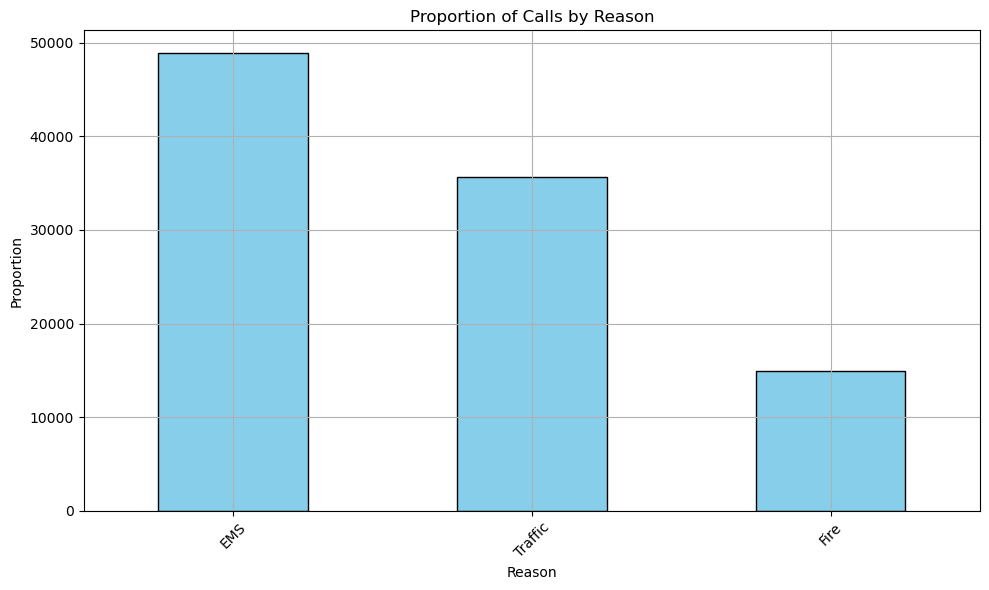

In [26]:
total = len(emergency['Reason'])
reasons = emergency['Reason'].value_counts()
proportions = reasons/total

plt.figure(figsize=(10, 6))  # Optional: Set the figure size
reasons.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Proportion of Calls by Reason')
plt.xlabel('Reason')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()





print (total, proportions)

<h3><center>End of Question 4</center></h3>

<h2><center>End of Assignment 1</center></h2>